In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import leather
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris 

In [2]:
steps = pd.read_csv("~/working/datasets/iphone_health/stepsData.csv")
list(steps)
steps.shape
steps.head()
steps = steps.drop(['startDate', 'endDate'], axis=1)
steps['creationDate'] = steps['creationDate'].str.slice(0, 10)
steps = steps.groupby('creationDate', as_index=False).sum()

In [3]:
cycling = pd.read_csv("~/working/datasets/iphone_health/cyclingData.csv")
list(cycling)
cycling.shape
cycling.head()
cycling = cycling.drop(['startDate', 'endDate'], axis=1)
cycling['creationDate'] = cycling['creationDate'].str.slice(0, 10)
cycling = cycling.groupby('creationDate', as_index=False).sum()

In [4]:
activity = steps.merge(cycling, 'outer', left_on='creationDate', right_on='creationDate').fillna(0)
activity.rename(columns={"creationDate" : "date"})
activity.head()

,creationDate,stepsWalked,kcalBurned,milesCycled
0,2015-12-07,774,0.0,0.0
1,2015-12-08,7033,0.0,0.0
2,2015-12-09,6428,0.0,0.0
3,2015-12-10,11769,0.0,0.0
4,2015-12-11,6246,0.0,0.0


In [25]:
iris = load_iris().data

house_prices = pd.read_csv("~/working/datasets/house_prices/Seattle_house_listings.csv")
house_prices.groupby('neighborhood').groups.keys()
neighborhood_means = house_prices.groupby('neighborhood')['listed_price'].mean()

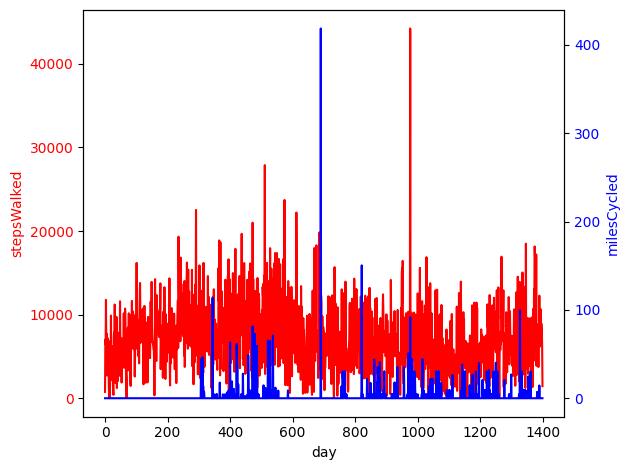

In [9]:
## Matplotlib
# barplot with 2 X-axes
t = np.arange(activity.shape[0])
fig, ax1 = plt.subplots()

ax1.set_xlabel('day')
ax1.set_ylabel('stepsWalked', color="red")
ax1.plot(t, activity['stepsWalked'], color="red")
ax1.tick_params(axis='y', labelcolor="red")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('milesCycled', color="blue")  # we already handled the x-label with ax1
ax2.plot(t, activity['milesCycled'], color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

fig.tight_layout()

Text(0, 0.5, 'kcalBurned')

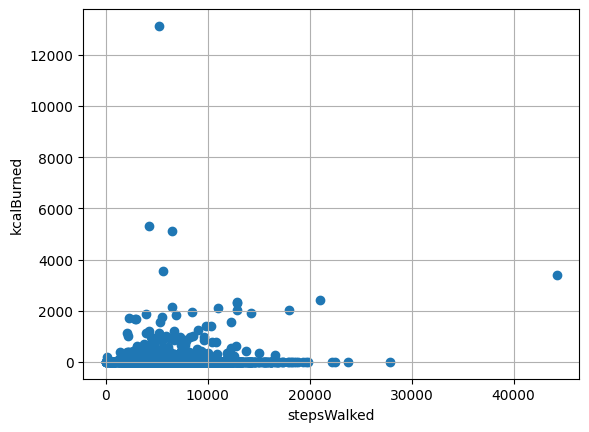

In [10]:
# scatterplot 
fig, ax = plt.subplots()
ax.scatter(activity['stepsWalked'], activity['kcalBurned'])
ax.grid(True)
ax.set_xlabel('stepsWalked', color="black")
ax.set_ylabel('kcalBurned', color="black")


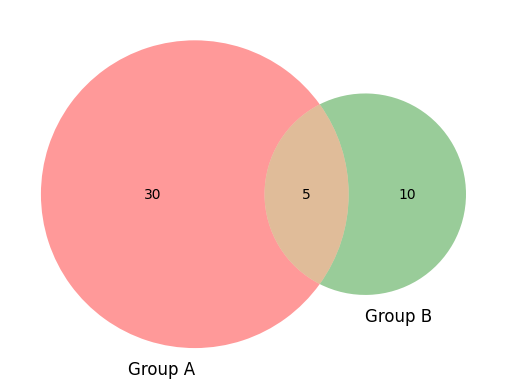

In [11]:
venn2(subsets = (30, 10, 5), set_labels = ('Group A', 'Group B'))

<Axes: xlabel='stepsWalked', ylabel='milesCycled'>

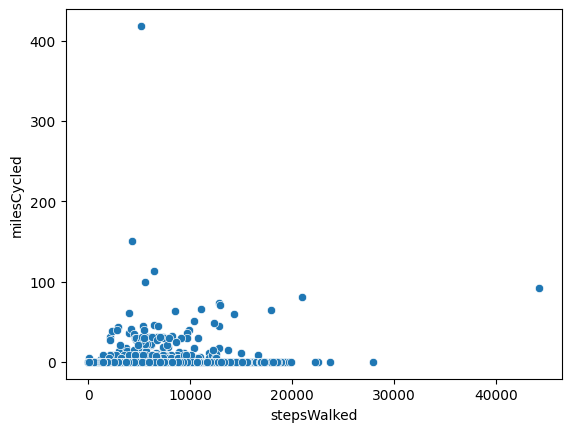

In [12]:
## Seaborn 
# scatterplot
sns.scatterplot(x="stepsWalked", y="milesCycled", data=activity)


<Axes: xlabel='stepsWalked', ylabel='Count'>

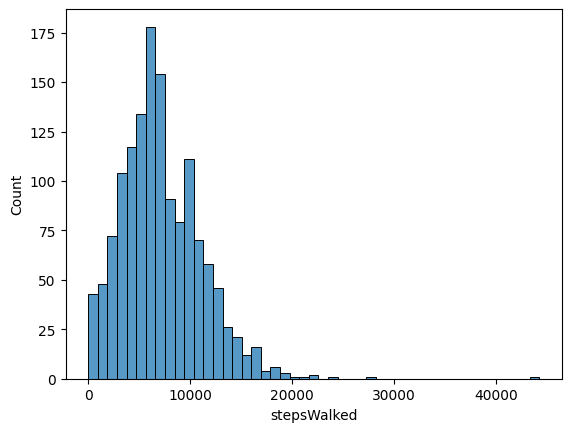

In [13]:
# histogram
sns.histplot(activity['stepsWalked'])

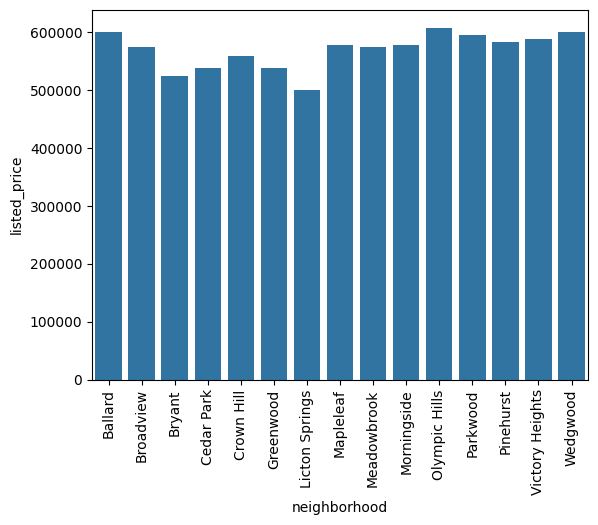

In [24]:



g = sns.barplot(data = neighborhood_means)
g.tick_params(axis='x', rotation=90)